In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
from scipy.stats import boxcox

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)


engine.dispose()

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Text(0.5, 1.0, 'Writing Score')

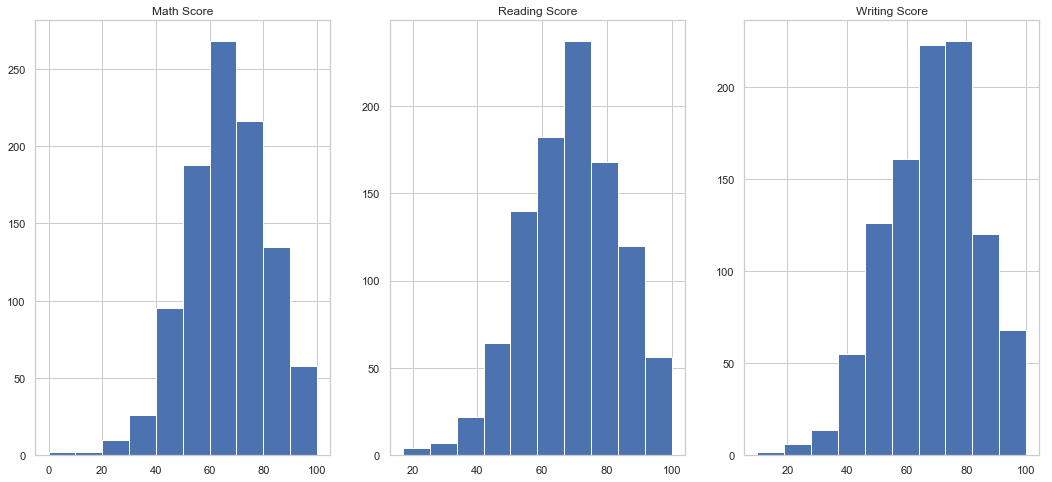

In [6]:
plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
plt.hist(df["math score"])
plt.title("Math Score")

plt.subplot(1,3,2)
plt.hist(df["reading score"])
plt.title("Reading Score")

plt.subplot(1,3,3)
plt.hist(df["writing score"])
plt.title("Writing Score")

([array([  1.,   9.,  23.,  80., 162., 212., 218., 163.,  86.,  46.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([  1.367324  ,  40.85618113,  80.34503826, 119.83389539,
        159.32275252, 198.81160965, 238.30046678, 277.78932391,
        317.27818104, 356.76703817, 396.2558953 ]),
 <a list of 2 Lists of Patches objects>)

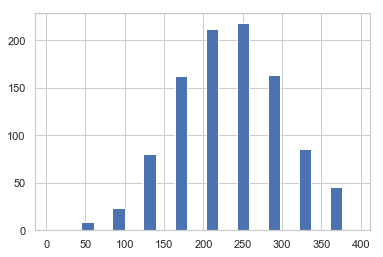

In [20]:
#It is not normally distributed, but it does have 2 tails
placeholder = df[df["math score"] != 0]

#math_boxcox = boxcox(placeholder[placeholder["math score"] != 0])
reading_boxcox = boxcox(df["reading score"])
writing_boxcox = boxcox(df["writing score"])
#Getting issues trying to make the math one work 

plt.hist(reading_boxcox)

([array([  3.,   7.,  40.,  91., 160., 210., 210., 158.,  73.,  48.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])],
 array([  1.37663696,  42.32435393,  83.2720709 , 124.21978788,
        165.16750485, 206.11522183, 247.0629388 , 288.01065577,
        328.95837275, 369.90608972, 410.85380669]),
 <a list of 2 Lists of Patches objects>)

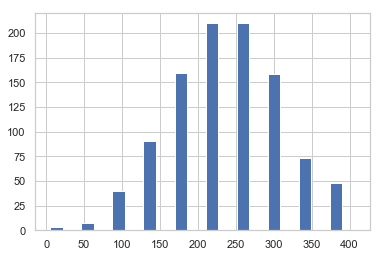

In [19]:
plt.hist(writing_boxcox)


In [ ]:
#They do not apprear to be normally distributed, I think.

df["weighted average"] = np.average